Assignment 8 
Steven Green
817121481


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
from sympy import *
x = symbols('x')
from sympy import roots, solve_poly_system
%matplotlib inline

Problem 1: 10 pts - For the function

$$
f(x) = \frac{8x}{x^{2} + 4}, ~ -1 \leq x \leq 1
$$
a) (2pts) Using an equispaced set of $6$ nodes, generate the Lagrange interpolating polynomial to $f(x)$. Generate a plot which shows how the error in your approximation varies over the interval.

b) (2pts) Using an equispaced set of $18$ nodes, generate the Lagrange interpolating polynomial to $f(x)$. Generate a plot which shows how the error in your approximation varies over the interval.

c) (2pts) At what number of equispaced nodes does your Lagrange interpolation approximation break down?

In [2]:
def lfun(xvals,jj,x):
    lval = np.ones(x.size)
    # Insert code here
    n = xvals.size
    for l in xrange(0,n):
        if l != jj:
            lval *= (x-xvals[l])/float(xvals[jj]-xvals[l])  

    return lval

In [3]:
def lagran_interp(xvals,fvals,x):
    n = fvals.size
    # Insert code here 
    ipoly = np.zeros(x.size)
    for jj in xrange(0,n):
        ipoly += fvals[jj]*lfun(xvals,jj,x)
   
    return ipoly

C:\Users\steve\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


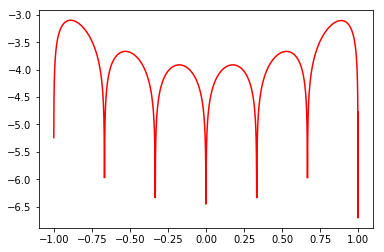

In [4]:
xtemp = np.linspace(-1.,1.,6000)
ftemp = (8*xtemp)/(xtemp**2+4)
xvals = xtemp[::1000]
fvals = ftemp[::1000]
finterp = lagran_interp(xvals,fvals,xtemp)
plt.plot(xtemp,np.log10(np.abs(ftemp-finterp)),ls = '-',color = 'r')


C:\Users\steve\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


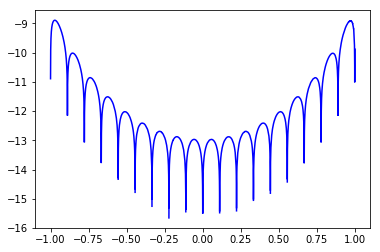

In [5]:
xtemp = np.linspace(-1.,1.,18000)
ftemp = (8*xtemp)/(xtemp**2+4)
xvals = xtemp[::1000]
fvals = ftemp[::1000]
finterp = lagran_interp(xvals,fvals,xtemp)
plt.plot(xtemp,np.log10(np.abs(ftemp-finterp)),ls = '-',color = 'b')

C:\Users\steve\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


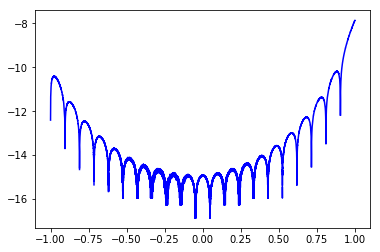

In [6]:
xtemp = np.linspace(-1.,1.,21000)
ftemp = (8*xtemp)/(xtemp**2+4)
xvals = xtemp[::1000]
fvals = ftemp[::1000]
finterp = lagran_interp(xvals,fvals,xtemp)
plt.plot(xtemp,np.log10(np.abs(ftemp-finterp)),ls = '-',color = 'b')

At what number of equispaced nodes does your Lagrange interpolation approximation break down?
after 21 equispaced nodes the lagrange interpolation approx breaks down


Problem 2: 10 pts - Here is a cubic polynomial with three closely spaced real roots:

$$
p(x) = 580x^4 - 2320x^3 -1160x^2 + 6960x -1740
$$
What are the exact roots of p?

Plot $p(x)$ for $-2\leq x \leq 4$. And plot the location of the four roots on the graph.

Starting with $x_{0}=2$, what does Newton's method do?

Starting with $x_{0}=0.3$ and $x_{1}=0.9$, what does the secant method do?

Starting with the interval $[0.5,2.9]$, what does bisection do?

In [7]:
solve((580*(x**4))-(2320*(x**3))-(1160*(x**2))+(6960*x)-1740,x)

[-sqrt(3), sqrt(3), -sqrt(3) + 2, sqrt(3) + 2]

Text(0.5,1,'P(x)')

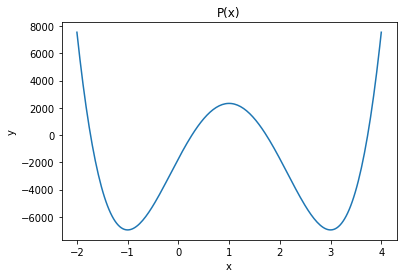

In [8]:
x = np.linspace(-2,4,200)
y = (580*(x**4))-(2320*(x**3))-(1160*(x**2))+(6960*x)-1740
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('P(x)')

In [9]:
f = lambda x: (580.*(x**4.))-(2320.*(x**3.))-(1160.*(x**2.))+(6960.*x)-1740.
fp = lambda x: 2320.*(x**3. - 3.*x**2. - x + 3.)

def Newtons_method(f,fp,x0,tol):
    x1 = x0 - f(x0)/fp(x0)
    
    while np.abs(x1-x0):
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        
    return x1

In [10]:
print(Newtons_method(f,fp,2.,1e-8))

1.73205080757


In [11]:
def secant_method_mod(f,x0,x1,tol):
    f0 = f(x0)
    f1 = f(x1)
    x2 = x1 - f1*(x1-x0)/(f1-f0)
    
    while np.abs(f1) >= tol:
        x0 = x1
        x1 = x2
        f0 = f1
        f1 = f(x1)
        x2 = x1 - f1*(x1-x0)/(f1-f0)
    
    return x2

In [12]:
f = lambda x: (580.*(x**4.))-(2320.*(x**3.))-(1160.*(x**2.))+(6960.*x)-1740.
secant_method_mod(f,.3,.9,1e-16)

0.2679491924311227

In [26]:
def bisec_method(a,b,f,tol):
    fa,fb = f(a),f(b)
    
    if fa*fb<0:
        c = (a+b)/2.
        capproxs = np.array([c]) # build an array to record the estimates we make for the root
        fc = f(c)
        while np.abs(fc)>=tol:
            if fa*fc<0:
                b = c
            else:
                a = c
          
            c = (a+b)/2.
            capproxs = np.append(capproxs,c)
            fc = f(c)
        return c

In [14]:
f = lambda x: (580.*(x**4.))-(2320.*(x**3.))-(1160.*(x**2.))+(6960.*x)-1740.

In [15]:
bisec_method(.5,2.9,f,1e-13)

1.7320508075688772

Problem 3 (10 pts): In class, we used the following program to convert an positive integer to a binary number

In [16]:
def bin_exp(d):
    bstr = ''
    temp = int(d)
    temp2 = d - temp
    ##print temp2
    
    while d > 0: 
        b0 = d%2
        d = (d-b0)/2
        if b0 == 0:
            bstr += '0'
        else:
            bstr += '1'
    print(bstr[::-1]),
    print('.'),
    print(bin_exp_dec(temp2)),
##    return bstr[::-1]

We also used the following program to convert a decimal number $d$ where $0\lt d\lt 1$ to binary.

In [17]:
def bin_exp_dec(d):
    bstr=''
    cnt = 0
    while cnt <= 53:
        d *= 2.
        if d >= 1.:
            b1 = 1.
            bstr += '1'
        else:
            b1 = 0.
            bstr += '0'
        d -= b1    
        cnt += 1
        
    return bstr

a) By modifying the two codes above, create a program that can convert any positive real number to binary.

b) Test your program by converting the positive real number $12.875$ to binary

In [18]:
bin_exp(12.875)

1101 . 111000000000000000000000000000000000000000000000000000


Problem 4: 10 pts - Find seven positive values of $x$ such that $0.04x^2 = 20\sin(x)$. Explain your choice of root finding method for doing this, and explain how you are certain that you have found seven positive values.

In [36]:
i = .0001
while i<21.:
    temp = .0002*i**2
    temp2 = math.sin(x)
    if temp == temp2:
        print i 
    i = i + .0001

TypeError: only size-1 arrays can be converted to Python scalars

In [37]:
print("3.1221,6.36428,9.2527,12.906,15.2258,19.7463,20.9244")

3.1221,6.36428,9.2527,12.906,15.2258,19.7463,20.9244


i was able to get this function while doing an online ide for c but just coulnt figure it out for the python application